In [1]:
import moviepy
from moviepy.editor import *

In [2]:
moviepy.editor.

SyntaxError: invalid syntax (780941461.py, line 1)

In [6]:
!ls slides

module0.0.slides.pdf	      module2.3.slides.pdf-35.png
module0.0.slides.pdf-01.png   module2.3.slides.pdf-36.png
module0.0.slides.pdf-02.png   module2.3.slides.pdf-37.png
module0.0.slides.pdf-03.png   module2.3.slides.pdf-38.png
module0.0.slides.pdf-04.png   module2.3.slides.pdf-39.png
module0.0.slides.pdf-05.png   module2.3.slides.pdf-40.png
module0.0.slides.pdf-06.png   module2.3.slides.pdf-41.png
module0.0.slides.pdf-07.png   module2.3.slides.pdf-42.png
module0.0.slides.pdf-08.png   module2.3.slides.pdf-43.png
module0.0.slides.pdf-09.png   module2.3.slides.pdf-44.png
module0.0.slides.pdf-10.png   module2.3.slides.pdf-45.png
module0.0.slides.pdf-11.png   module2.3.slides.pdf-46.png
module0.0.slides.pdf-12.png   module2.3.slides.pdf-47.png
module0.0.slides.pdf-13.png   module2.3.slides.pdf-48.png
module0.0.slides.pdf-14.png   module2.3.slides.pdf-49.png
module0.0.slides.pdf-15.png   module2.3.slides.pdf-50.png
module0.0.slides.pdf-16.png   module2.3.slides.pdf-51.png
module0.0.slides.


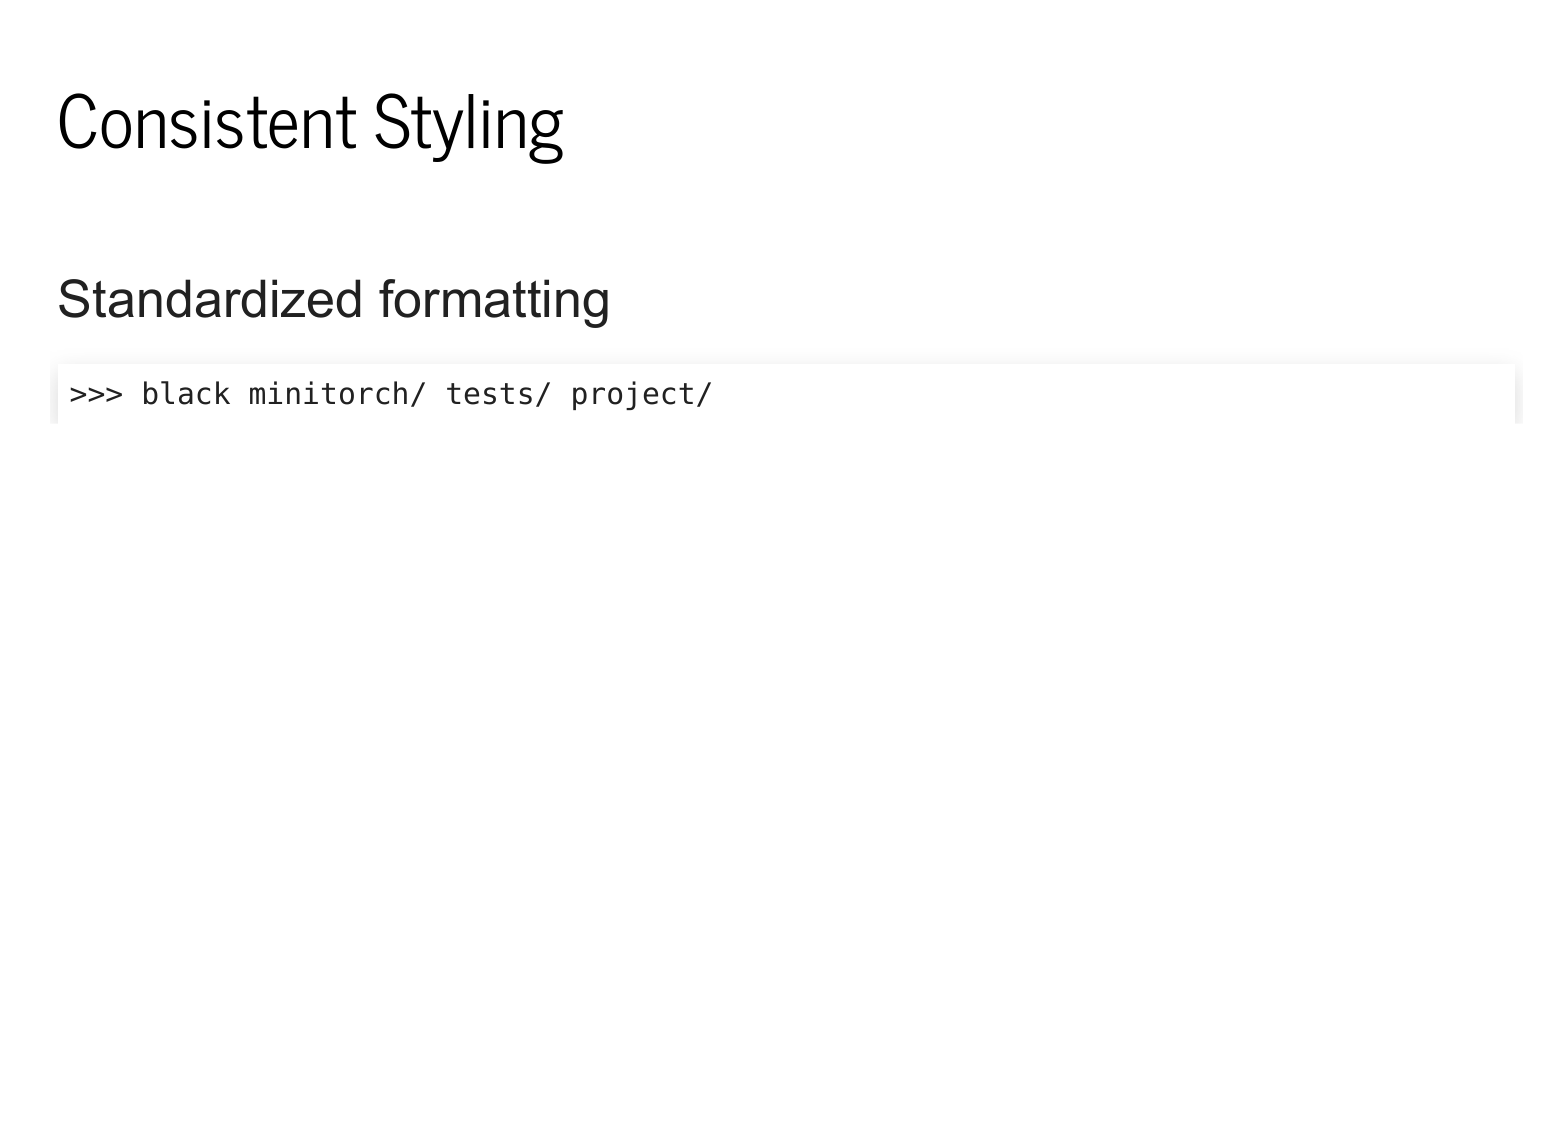

In [7]:
clip = ImageClip("slides/module0.1.slides.pdf-32.png")
clip.ipython_display() 

In [19]:
!ls audio

module0.1.txt  module1.wav


In [22]:
d = {}
for l in open("audio/module0.1.txt"):
    time, _, name = l.split()
    d[name] = float(time)

In [23]:
slides = []
last = 0.0
for n, t in d.items():
    slides.append((n, last, t))
    last = t
    

In [35]:
d[2]

12.645397

In [35]:
import math
# Iterate over audio to find the non-silent parts. Outputs a list of
# (speaking_start, speaking_end) intervals.
# Args:
#  window_size: (in seconds) hunt for silence in windows of this size
#  volume_threshold: volume below this threshold is considered to be silence
#  ease_in: (in seconds) add this much silence around speaking intervals
def find_speaking(audio_clip, window_size=0.1, volume_threshold=0.01, ease_in=0.25):
    # First, iterate over audio to find all silent windows.
    num_windows = math.floor(audio_clip.end/window_size)
    window_is_silent = []
    for i in range(num_windows):
        s = audio_clip.subclip(i * window_size, (i + 1) * window_size)
        v = s.max_volume()
        window_is_silent.append(v < volume_threshold)
    window_is_silent.append(True)
    # Find speaking intervals.
    speaking_start = 0
    speaking_end = 0
    speaking_intervals = []
    for i in range(1, len(window_is_silent)):
        e1 = window_is_silent[i - 1]
        e2 = window_is_silent[i]
        # silence -> speaking
        if e1 and not e2:
            speaking_start = i * window_size
        # speaking -> silence, now have a speaking interval
        if not e1 and e2:
            speaking_end = i * window_size
            new_speaking_interval = [speaking_start - ease_in, speaking_end + ease_in]
            # With tiny windows, this can sometimes overlap the previous window, so merge.
            need_to_merge = len(speaking_intervals) > 0 and speaking_intervals[-1][1] > new_speaking_interval[0]
            if need_to_merge:
                merged_interval = [max(0, speaking_intervals[-1][0]), new_speaking_interval[1]]
                speaking_intervals[-1] = merged_interval
            else:
                speaking_intervals.append(new_speaking_interval)

    return speaking_intervals

In [42]:
?clip2.set_start

In [44]:
images = []
sound = []
for i in range(5):
    x = slides[i]
    clip2 = AudioFileClip("audio/module0.1.wav")
    #print(d)
    clip2 = clip2.subclip(x[1], x[2])
    intervals_to_keep = find_speaking(clip2)
    #print("Keeping intervals: " + str(intervals_to_keep))
    keep_clips = [clip2.subclip(start, end) for [start, end] in intervals_to_keep]
    clip2 = concatenate_audioclips(keep_clips)
    sound.append(clip2)
    clip = ImageClip(x[0]).set_duration(clip2.duration)
    images.append(clip)
video = concatenate_videoclips(images, method="compose")
video.audio = concatenate_audioclips(sound)
concat_clip.write_videofile("module0.1.mp4", fps=fps)

NameError: name 'concat_clip' is not defined

In [30]:
clip2.duration

0.00268000000000157

In [25]:
!cat audio/module0.1.txt

6.321474	6.321474	1
12.645397	12.645397	2
19.004308	19.004308	3 


In [ ]:
clip2.

MoviePy - Writing audio in __temp__.mp3


MoviePy - Done.
